In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_info = pd.read_csv('/Users/andrew/Downloads/TensorFlow_FILES/DATA/lending_club_info.csv',
                 index_col='LoanStatNew')

In [3]:
print(data_info['Description'])

LoanStatNew
loan_amnt               The listed amount of the loan applied for by t...
term                    The number of payments on the loan. Values are...
int_rate                                        Interest Rate on the loan
installment             The monthly payment owed by the borrower if th...
grade                                              LC assigned loan grade
sub_grade                                       LC assigned loan subgrade
emp_title               The job title supplied by the Borrower when ap...
emp_length              Employment length in years. Possible values ar...
home_ownership          The home ownership status provided by the borr...
annual_inc              The self-reported annual income provided by th...
verification_status     Indicates if income was verified by LC, not ve...
issue_d                               The month which the loan was funded
loan_status                                    Current status of the loan
purpose                 A 

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
data_info.loc['loan_status']['Description']

'Current status of the loan'

In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [8]:
df = pd.read_csv('/Users/andrew/Downloads/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [9]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,...,Retirement Counselor,St Francis Medical Center,Data Center Specialist II,Operations Manager,Michael's Arts & Crafts,licensed bankere,Agent,City Carrier,"Gracon Services, Inc",Internal Revenue Service
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0


In [10]:
df['sub_grade'].loc[1].strip(df['sub_grade'].loc[1][:1])

'5'

In [11]:
df['sub_grade'] = df['sub_grade'].apply(lambda x: int(x.strip(x[:1])))

In [12]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [13]:
df_app_type = pd.get_dummies(df['application_type'],drop_first=True)

In [14]:
df = df.join(df_app_type).drop('application_type',axis=1)

In [15]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,INDIVIDUAL,JOINT
0,10000.0,36 months,11.44,329.48,B,4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",True,False
1,8000.0,36 months,11.99,265.68,B,5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",True,False
2,15600.0,36 months,10.49,506.97,B,3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",True,False
3,7200.0,36 months,6.49,220.65,A,2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",True,False
4,24375.0,60 months,17.27,609.33,C,5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",True,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  int64  
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [17]:
#data_info.loc['initial_list_status']['Description']

In [18]:
#df['initial_list_status'].unique()

In [19]:
#df[df['initial_list_status']=='w']['loan_status'].value_counts()

In [20]:
#df = df.drop(columns=['initial_list_status']) 

In [21]:
df_purpose = pd.get_dummies(df['purpose'],drop_first=True)

In [22]:
df = df.join(df_purpose).drop(columns=['purpose'])

In [23]:
#df['verification_status'].unique()

<Axes: xlabel='grade'>

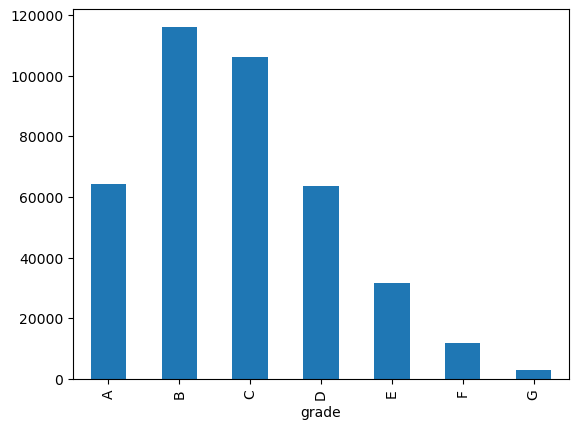

In [24]:
df.groupby('grade').count()['sub_grade'].plot(kind='bar')

In [25]:
#df_for_model = df[['loan_amnt','term','int_rate','grade','emp_length','home_ownership','annual_inc','dti','revol_util','mort_acc','loan_status']]

In [26]:
#df_for_model.head()

In [27]:
#df_for_model['loan_status'] = df_for_model['loan_status'].map({'Charged Off':1,'Fully Paid':0})

In [28]:
df_source = pd.get_dummies(df['verification_status'],drop_first=True)

In [29]:
df = df.join(df_source).drop(columns=['verification_status'])

In [30]:
# df.groupby(Verified).count()

In [31]:
#df['home_ownership'].unique()

In [32]:
df_home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.join(df_home_ownership).drop(columns=['home_ownership'])

In [33]:
#df_for_model = df_for_model.join(df_home_ownership).drop(columns=['home_ownership'])

In [34]:
#df_for_model['emp_length'] = df_for_model['emp_length'].map({'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,
#                                        '7 years':7,'8 years':8,'9 years':9,'10+ years':10,'< 1 year':0.5})

In [35]:
df['emp_length'] = df['emp_length'].map({'1 year':1,'2 years':2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,
                                        '7 years':7,'8 years':8,'9 years':9,'10+ years':10,'< 1 year':0.5})

In [36]:
df['address'].loc[396028]


'7843 Blake Freeway Apt. 229\nNew Michael, FL 29597'

In [37]:
df['ZIP_code'] = df['address'].apply(lambda x: int(x[-5:]))

In [38]:
#df_for_model['ZIP_code'] = df['ZIP_code']

In [39]:
#df.groupby('ZIP_code').agg('count')

In [40]:
df_zip = pd.get_dummies(df['ZIP_code'],prefix='Zip',drop_first=True)

In [41]:
df = df.join(df_zip).drop(columns=['ZIP_code'])

In [42]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,issue_d,...,RENT,Zip_5113,Zip_11650,Zip_22690,Zip_29597,Zip_30723,Zip_48052,Zip_70466,Zip_86630,Zip_93700
0,10000.0,36 months,11.44,329.48,B,4,Marketing,10.0,117000.0,Jan-2015,...,True,False,False,True,False,False,False,False,False,False
1,8000.0,36 months,11.99,265.68,B,5,Credit analyst,4.0,65000.0,Jan-2015,...,False,True,False,False,False,False,False,False,False,False


In [43]:
#data_info.loc['dti']['Description']

In [44]:
#data_info.loc['sub_grade']['Description']

In [45]:
df['grade'] = df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
df['term'] = df['term'].map({' 36 months':36,' 60 months':60})

In [46]:
#df_for_model['grade'] = df_for_model['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [47]:
#df_for_model['term'] = df_for_model['term'].map({' 36 months':36,' 60 months':60})

In [48]:
#df_for_model['term'].unique()

In [49]:
#df.groupby('loan_status')['term'].count()

In [50]:
#df_for_model['loan_status'].value_counts()

In [51]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_44888/3004380484.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d'] = pd.to_datetime(df['issue_d'])


In [52]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

/var/folders/4z/s5yytqj535948_tn28lrcsr40000gn/T/ipykernel_44888/2066518133.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])


In [53]:
df['borrowing_experience'] = df['issue_d'] - df['earliest_cr_line']

In [54]:
#data_info.loc['issue_d']['Description']

In [55]:
#data_info.loc['title']['Description']

In [56]:
df = df.drop(columns=['emp_title','issue_d','title','earliest_cr_line'])

In [57]:
#df.transpose()

In [58]:
#df.drop(columns=['address']).corr()['loan_status'].sort_values()

In [59]:
import datetime as dt
df['borrowing_experience'] = df['borrowing_experience'].dt.days

In [60]:
#plt.figure(figsize=(10,6))
#sns.heatmap(df.corr())

In [61]:
#type(df['borrowing_experience'][0])

In [62]:
#df_for_model.duplicated().sum()

In [63]:
#df_for_model.isnull().sum()

In [64]:
#df_for_model['emp_length'] = df_for_model['emp_length'].fillna(df_for_model['emp_length'].median())

In [65]:
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].median())

In [66]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

In [67]:
#df_for_model['mort_acc'] = df_for_model['mort_acc'].fillna(df_for_model['mort_acc'].median())

In [68]:
df['mort_acc'] = df['mort_acc'].fillna(df['mort_acc'].median())

In [69]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

In [70]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
annual_inc              0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
INDIVIDUAL              0
JOINT                   0
credit_card             0
debt_consolidation      0
educational             0
home_improvement        0
house                   0
major_purchase          0
medical                 0
moving                  0
other                   0
renewable_energy        0
small_business          0
vacation                0
wedding                 0
Source Verified         0
Verified                0
MORTGAGE                0
NONE                    0
OTHER       

In [71]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,...,Zip_5113,Zip_11650,Zip_22690,Zip_29597,Zip_30723,Zip_48052,Zip_70466,Zip_86630,Zip_93700,borrowing_experience
0,10000.0,36,11.44,329.48,2,4,10.0,117000.0,Fully Paid,26.24,...,False,False,True,False,False,False,False,False,False,8980
1,8000.0,36,11.99,265.68,2,5,4.0,65000.0,Fully Paid,22.05,...,True,False,False,False,False,False,False,False,False,3836
2,15600.0,36,10.49,506.97,2,3,0.5,43057.0,Fully Paid,12.79,...,True,False,False,False,False,False,False,False,False,2710
3,7200.0,36,6.49,220.65,1,2,6.0,54000.0,Fully Paid,2.60,...,False,False,False,False,False,False,False,False,False,2983
4,24375.0,60,17.27,609.33,3,5,9.0,55000.0,Charged Off,33.95,...,False,True,False,False,False,False,False,False,False,5145


In [72]:
df_init_list = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = df.join(df_init_list).drop(columns=['initial_list_status'])

In [73]:
#df_for_model.isnull().sum()

In [74]:
#df_for_model = df_for_model.dropna()

In [75]:
#df_for_model.isnull().sum()

In [76]:
#df_for_model.transpose()

<Axes: xlabel='loan_status', ylabel='count'>

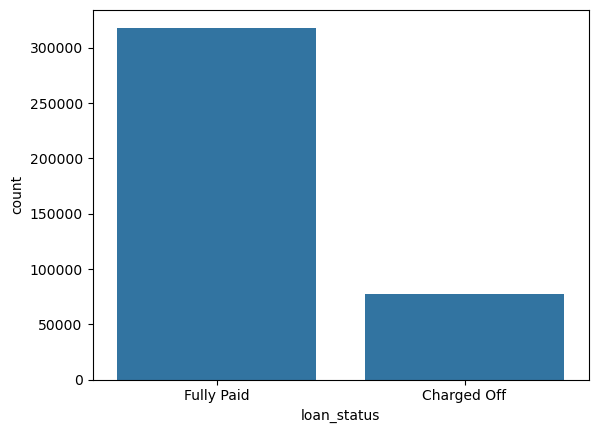

In [77]:
sns.countplot(x='loan_status',data=df)

In [78]:
df['loan_status'].value_counts()/len(df)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: count, dtype: float64

<Axes: xlabel='loan_amnt', ylabel='Count'>

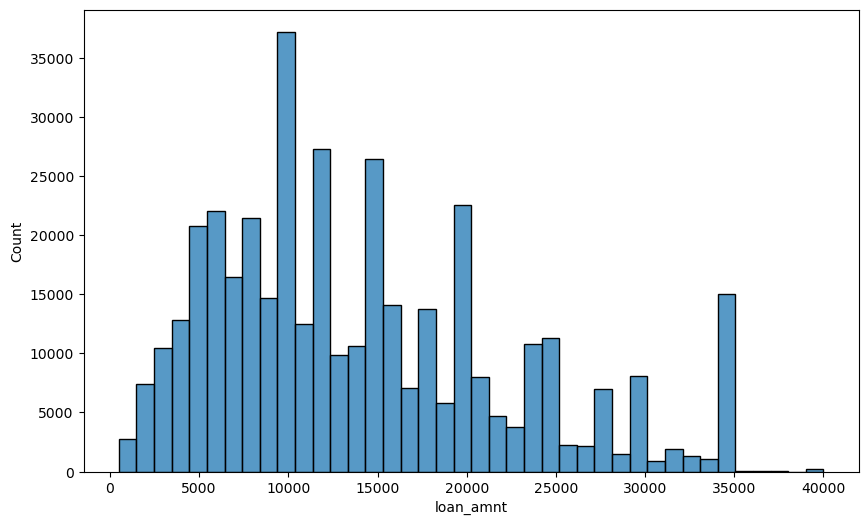

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amnt'],kde=False,bins=40)

In [80]:
#sns.scatterplot(y='installment',x='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

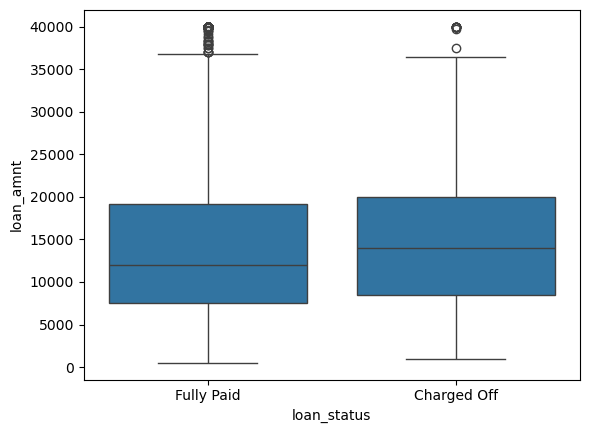

In [81]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [82]:
df['loan_amnt'].describe()

count    396030.000000
mean      14113.888089
std        8357.441341
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

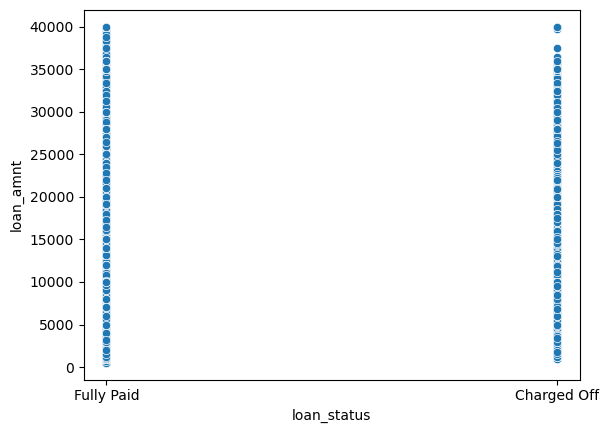

In [83]:
import seaborn as sns
sns.scatterplot(data=df[['loan_amnt','loan_status']],x='loan_status',y='loan_amnt')

In [84]:
df['loan_status'] = df['loan_status'].map({'Charged Off':1,'Fully Paid':0})

In [85]:
df.drop(columns=['address'],inplace=True)

In [86]:
df_model = df.sample(int(len(df)*0.1))

In [87]:
df_model.shape

(39603, 50)

In [88]:
df_model['loan_status'].value_counts()/(len(df))*100

loan_status
0    8.039795
1    1.960205
Name: count, dtype: float64

In [89]:
df_model.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,...,Zip_11650,Zip_22690,Zip_29597,Zip_30723,Zip_48052,Zip_70466,Zip_86630,Zip_93700,borrowing_experience,w
103293,6250.0,36,17.10,223.15,3,5,4.0,21000.1,0,20.97,...,False,False,False,True,False,False,False,False,3014,False
196202,16325.0,36,6.89,503.25,1,3,10.0,145000.0,0,20.94,...,False,False,False,False,True,False,False,False,11902,True
183087,14600.0,60,18.25,372.74,4,3,2.0,47000.0,0,13.61,...,False,False,True,False,False,False,False,False,2861,False
181597,8000.0,36,10.99,261.88,2,4,0.5,35000.0,0,13.99,...,False,False,True,False,False,False,False,False,5264,False
195771,10850.0,36,12.69,363.97,3,2,7.0,56825.0,0,26.93,...,False,True,False,False,False,False,False,False,7032,False


In [90]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39603 entries, 103293 to 382477
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39603 non-null  float64
 1   term                  39603 non-null  int64  
 2   int_rate              39603 non-null  float64
 3   installment           39603 non-null  float64
 4   grade                 39603 non-null  int64  
 5   sub_grade             39603 non-null  int64  
 6   emp_length            39603 non-null  float64
 7   annual_inc            39603 non-null  float64
 8   loan_status           39603 non-null  int64  
 9   dti                   39603 non-null  float64
 10  open_acc              39603 non-null  float64
 11  pub_rec               39603 non-null  float64
 12  revol_bal             39603 non-null  float64
 13  revol_util            39603 non-null  float64
 14  total_acc             39603 non-null  float64
 15  mort_acc          

In [91]:
#df_for_model_v2 = df_for_model.drop(columns=['title','emp_title','home_ownership','sub_grade','verification_status','address'])

In [92]:
X = df_model.drop(columns=['loan_status']).values
y = df_model['loan_status'].values

In [93]:
X

array([[6250.0, 36, 17.1, ..., False, 3014, False],
       [16325.0, 36, 6.89, ..., False, 11902, True],
       [14600.0, 60, 18.25, ..., False, 2861, False],
       ...,
       [15550.0, 60, 16.99, ..., False, 4200, True],
       [5000.0, 36, 13.11, ..., False, 4171, True],
       [15000.0, 36, 13.11, ..., False, 6726, True]], dtype=object)

In [94]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,stratify=y,random_state=101)

In [96]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.25, stratify=y_train,random_state = 101)

In [97]:
from sklearn.preprocessing import MinMaxScaler

In [98]:
scaler = MinMaxScaler()

In [99]:
X_tr = scaler.fit_transform(X_tr)

In [100]:
X_tr

array([[0.24050633, 1.        , 0.50765607, ..., 0.        , 0.22848587,
        0.        ],
       [0.14556962, 0.        , 0.61562623, ..., 0.        , 0.15332205,
        0.        ],
       [0.20253165, 0.        , 0.02394974, ..., 0.        , 0.28924185,
        0.        ],
       ...,
       [0.4835443 , 0.        , 0.44091088, ..., 0.        , 0.24697305,
        0.        ],
       [0.3056962 , 0.        , 0.58421673, ..., 0.        , 0.12021004,
        1.        ],
       [0.20316456, 0.        , 0.69375736, ..., 0.        , 0.20479104,
        1.        ]])

In [101]:
X_val = scaler.transform(X_val)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [103]:
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

Metal device set to: Apple M1


2024-02-15 16:58:27.572528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-15 16:58:27.573968: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [104]:
%%time
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

model.fit(x=X_tr,y=y_tr,epochs=100,validation_data=(X_val,y_val),
         callbacks=[early_stop])

Epoch 1/100


2024-02-15 16:58:27.964027: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-15 16:58:28.384566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


697/697 [==============================] - ETA: 0s - loss: 0.4420

2024-02-15 16:58:34.097620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


697/697 [==============================] - 7s 10ms/step - loss: 0.4420 - val_loss: 0.3195
Epoch 2/100
697/697 [==============================] - 6s 9ms/step - loss: 0.3170 - val_loss: 0.2812
Epoch 3/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2956 - val_loss: 0.2803
Epoch 4/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2853 - val_loss: 0.2722
Epoch 5/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2798 - val_loss: 0.2680
Epoch 6/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2758 - val_loss: 0.2664
Epoch 7/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2734 - val_loss: 0.2666
Epoch 8/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2717 - val_loss: 0.2665
Epoch 9/100
697/697 [==============================] - 5s 8ms/step - loss: 0.2698 - val_loss: 0.2633
Epoch 10/100
697/697 [==============================] - 6s 8ms/step - loss: 0.2693 - val_loss: 0.2648


In [105]:
losses = pd.DataFrame(model.history.history)

<Axes: >

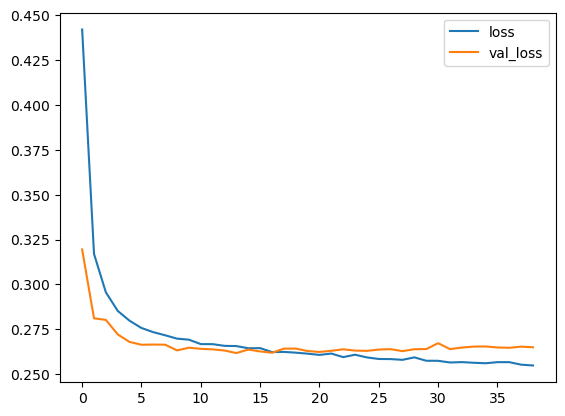

In [106]:
losses.plot()

In [107]:
predictions = model.predict(X_val)

 24/233 [==>...........................] - ETA: 0s 

2024-02-15 17:02:14.095359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


233/233 [==============================] - 1s 2ms/step


In [108]:
predictions = np.round(predictions).astype(int)

In [116]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,predictions))
print(confusion_matrix(y_val,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      5970
           1       0.99      0.44      0.61      1456

    accuracy                           0.89      7426
   macro avg       0.93      0.72      0.77      7426
weighted avg       0.90      0.89      0.87      7426

[[5961    9]
 [ 814  642]]


In [117]:
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score

In [118]:
print('Accuracy score: ',accuracy_score(y_val,predictions))
print('Recall score: ',recall_score(y_val,predictions))
print('Precision score: ',precision_score(y_val,predictions))
print('F1 score: ',f1_score(y_val,predictions))

Accuracy score:  0.8891731753299219
Recall score:  0.4409340659340659
Precision score:  0.9861751152073732
F1 score:  0.6093972472710014


In [119]:
X_test = scaler.transform(X_test)

In [120]:
Y_PREDS = model.predict(X_test)

310/310 [==============================] - 1s 2ms/step


In [121]:
Y_PREDS = np.round(Y_PREDS).astype(int)

In [122]:
print(classification_report(y_test, Y_PREDS))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      7960
           1       1.00      0.42      0.59      1941

    accuracy                           0.89      9901
   macro avg       0.94      0.71      0.76      9901
weighted avg       0.90      0.89      0.87      9901



In [123]:
X_TR,X_TEST,y_TR,y_TEST=train_test_split(X,y,test_size=0.3)

In [124]:
%%time
#Training our model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

dtree.fit(X_TR, y_TR)

predictions = dtree.predict(X_TEST)

#Evaluating accuracy of model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_TEST, predictions))
print('\n')
print(classification_report(y_TEST, predictions))

from sklearn import metrics
print("Decision Tree model accuracy:", metrics.accuracy_score(y_TEST, predictions))
print("Decision Tree model recall:", metrics.recall_score(y_TEST, predictions))
print("Decision Tree model precision:", metrics.precision_score(y_TEST, predictions))
print("Decision Tree model F1:", metrics.f1_score(y_TEST, predictions))

[[8532 1043]
 [ 998 1308]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9575
           1       0.56      0.57      0.56      2306

    accuracy                           0.83     11881
   macro avg       0.73      0.73      0.73     11881
weighted avg       0.83      0.83      0.83     11881

Decision Tree model accuracy: 0.828213113374295
Decision Tree model recall: 0.5672159583694709
Decision Tree model precision: 0.5563589961718418
Decision Tree model F1: 0.5617350225467039
CPU times: user 440 ms, sys: 63.7 ms, total: 504 ms
Wall time: 776 ms


In [125]:
%%time
#Training our model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_TR, y_TR)

predictions = dtree.predict(X_TEST)

#Evaluating accuracy of model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_TEST, predictions))
print('\n')
print(classification_report(y_TEST, predictions))

from sklearn import metrics
print("RFC model accuracy:", metrics.accuracy_score(y_TEST, predictions))
print("RFC Tree model recall:", metrics.recall_score(y_TEST, predictions))
print("RFC Tree model precision:", metrics.precision_score(y_TEST, predictions))
print("RFC Tree model F1:", metrics.f1_score(y_TEST, predictions))

[[8532 1043]
 [ 998 1308]]


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      9575
           1       0.56      0.57      0.56      2306

    accuracy                           0.83     11881
   macro avg       0.73      0.73      0.73     11881
weighted avg       0.83      0.83      0.83     11881

RFC model accuracy: 0.828213113374295
RFC Tree model recall: 0.5672159583694709
RFC Tree model precision: 0.5563589961718418
RFC Tree model F1: 0.5617350225467039
CPU times: user 3.72 s, sys: 62.2 ms, total: 3.78 s
Wall time: 3.87 s


In [126]:
X_ = df.drop(columns=['loan_status'])
y_ = df['loan_status']
X__tr,X__test,y__tr,y__test = train_test_split(X_,y_, test_size=0.25,stratify=y_,random_state=101)

In [127]:
%%time
rfc = RandomForestClassifier()

rfc.fit(X__tr, y__tr)

predictions = rfc.predict(X__test)

#Evaluating accuracy of model
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y__test, predictions))
print('\n')
print(classification_report(y__test, predictions))

from sklearn import metrics
print("RFC model accuracy:", metrics.accuracy_score(y__test, predictions))
print("RFC Tree model recall:", metrics.recall_score(y__test, predictions))
print("RFC Tree model precision:", metrics.precision_score(y__test, predictions))
print("RFC Tree model F1:", metrics.f1_score(y__test, predictions))

[[79218   372]
 [10580  8838]]


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     79590
           1       0.96      0.46      0.62     19418

    accuracy                           0.89     99008
   macro avg       0.92      0.73      0.78     99008
weighted avg       0.90      0.89      0.87     99008

RFC model accuracy: 0.889382676147382
RFC Tree model recall: 0.45514471109280047
RFC Tree model precision: 0.9596091205211726
RFC Tree model F1: 0.6174374738018723
CPU times: user 46 s, sys: 410 ms, total: 46.4 s
Wall time: 46.7 s
